## Baseline model

## Final Project Submission

Please fill out:
* __Student name:__ Kristine Petrosyan
* __Student pace:__ part time
* __Scheduled project review date/time:__ 
* __Instructor name:__ Victor

## Problem Statement

The goal of this project is to build a model to predict bookings cancellation likelihood so that way we can tell whether customer will cancel the reservation or no.


We will implement Machine Learning algorithms to build the baseline model and do feature engineering. Will examine the hotel booking dataset from Kaggle. The aim is to build a model to predict bookings cancellation likelihood.

In [1]:
import datetime
start = datetime.datetime.now()

### Import Libraries

In [2]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import auc, classification_report,  confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

#### Import Functions

In [4]:
#Print Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def print_metrics(labels, preds, TN, TP, FN, FP, numObsv):
    '''
    Purpose: Print Performance Metrics
    '''
    print(f'Precision Score: {precision_score(labels, preds)}')
    print(f'Specificity: {TN / (TN+FP)}')  # True Negative Rate
    print(f'Recall Score: {recall_score(labels, preds)}')  # True Positive Rate
    print(f'Accuracy Score: {accuracy_score(labels, preds)}')
    print(f'F1 Score: {f1_score(labels, preds)}')
    print(f'Misclassification Rate: {(1 - accuracy_score(labels, preds))}')
    print(f'_________ \n')

    print(f'Among {numObsv} observations our model is predicting {TP+FP} canceled. \nIn actual,  {TP+FN} have canceled and among those, the model identified {TP} correctly.\n')

    print(f'True  Positive: {TP}.  The model has predicted the positive (1) case, correctly.')
    print(f'True  Negative: {TN}.  The model has predicted the negative case (0), correctly.')
    print(f'False Positive: {FP}.  The model has predicted these customers would cancel, but in actual they do not cancel -- Type I Error.')
    print(f'False Negative: {FN}.  The model has predicted these customers will not cancel, but in actual they do cancel -- Type II Error.')

    print(f'*_Accuracy Score:  {(TP+TN)/(TP+FP+TN+FN)} is the accuracy of the predicton model.')
    print(f'*_Precision Score: {TP/(TP+FP)} is the measure of the accuracy of the model in predicting that a customer will cancel the booking.')
    print(f'Sensitivity (Recall) Score: {TP/(TP+FN)} of the cancellations are correctly identified as been canceled -- True Postive Rate.')
    print(f'Specificity Score:          {TN/(TN+FP)} of the successful bookings are correctly identified as not been canceled -- True Negative Rate.')

### Load Dataset

In [5]:
data = pd.read_csv('../input/hotel-booking-demand/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
data.shape

(119390, 32)

# EDA

In [8]:
# Check column names for spaces
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
# Check for missing values
data.isna().any().any()

True

In [10]:
# Check for missing values
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# Check datatypes, # rows and columns, missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
# To view statistical properties of numerical variables:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
# To view the statistical properties of character variables:
data.describe(include=['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [14]:
# Find numerical variables
numerical_vars = [x for x in data.columns if (data[x].dtype=='int64' or data[x].dtype=='float64')]
print(f'There are {len(numerical_vars)} numerical variables.\n')
print(f'The numerical variables are : {numerical_vars}\n')

There are 20 numerical variables.

The numerical variables are : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']



In [15]:
# Check for erroreous values in numerical data values
for x in numerical_vars:
    print(f'\n')
    print(data[x].value_counts(normalize = True))



0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


0      0.053145
1      0.028981
2      0.017330
3      0.015211
4      0.014365
         ...   
458    0.000008
371    0.000008
737    0.000008
435    0.000008
387    0.000008
Name: lead_time, Length: 479, dtype: float64


2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64


33    0.029986
30    0.025856
32    0.025505
34    0.025463
18    0.024508
21    0.023905
28    0.023896
17    0.023494
20    0.023327
29    0.023143
42    0.023084
31    0.022958
41    0.022607
15    0.022523
27    0.022313
25    0.022305
38    0.022288
23    0.021953
35    0.021719
39    0.021618
22    0.021325
24    0.020923
13    0.020236
16    0.020144
19    0.020119
40    0.020077
26    0.020027
43    0.019700
44    0.019030
14    0.018963
37    0.018670
8     0.018561
36    0.018151
10    0.018000
9     0.017732
7     0.017665
12    0.017447
11    0.017338
45    0.016258
53    0.015211
49    0.014926
47 

In [16]:
# Find categorical variables
categorical_vars = [x for x in data.columns if data[x].dtype=='O']
print(f'There are {len(categorical_vars)} categorical variables.\n')
print(f'The categorical variables are : {categorical_vars}\n')

There are 12 categorical variables.

The categorical variables are : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']



In [17]:
# Check for erroreous values in categorical data values
for var in categorical_vars: 
    print(f'\n')
    print(data[var].value_counts(normalize = True))



City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64


August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64


BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64


PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
         ...   
MLI    0.000008
PYF    0.000008
VGB    0.000008
UMI    0.000008
ASM    0.000008
Name: country, Length: 177, dtype: float64


Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64


TA/T

#### Observations: EDA 
- reservation_status_date dtype = object, will need to change to datetime.
- company, agent and country columns have missing rows
- Many object data type columns can be represented by categorical columns
- Dataset contains 12 character variables and 20 numerical variables.
- is_canceled column is the target variable.

All Visualizations are done in the Capstone_kristine_EDA.ipynb

#### Target Variable

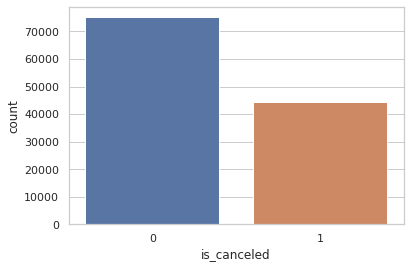

In [18]:
# Evaluate Target Values
sns.countplot(data['is_canceled']);

In [19]:
data['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

> Dataset contains a distribution of __37 %__ entries labeled as booking cancellations and __76%__ entries labeled as successful bookings.

#### Evaluate data correlations

In [27]:
data.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

## Pandas Profiling

#### Observations: Pandas Profiling 
- (Review Report Output from EDA Analysis)
- output_file='./Booking Cancellation Profile - ML.html'

# Data Cleaning

In [20]:
# Copy raw dataset to new dataframe for furter processing
df = data.copy()

In [21]:
df.shape

(119390, 32)

#### Change Data type

In [22]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

#### Drop columns

In [23]:
# Drop column(s) due to alot of missing entries (or pre-preprocessing column(s))
df = df.drop(['company', 'booking_changes', 'reservation_status'], axis=1) # 'days_in_waiting_list'], axis=1)


> Dropped the following columns:
- company: 112593 contained (0's) out of 119389 (94% missing values).
- booking changes and reservation_status created data leakage (leakage predictors).  The number of booking changes is a possible source of leakage, because this information can change over time. Heuristic created by summing the number of booking changes (amendments) prior to arrival that can indicate cancellation intentions.
- Decision: Do __not__ drop - days_in_waiting_list = Number of days the booking was on a waiting list prior to confirming the availability and being confirmed as a booking;  This column may need more evaluation to determine if it is creating data leakage.

#### Drop rows

In [24]:
# Drop rows with missing values
df = df.dropna().reset_index(drop=True)

#### Impute the missing values in the dataset

- Decision: Do __not__ impute the columns with missing values in the dataset, instead decided to dropna.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102894 entries, 0 to 102893
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           102894 non-null  object        
 1   is_canceled                     102894 non-null  int64         
 2   lead_time                       102894 non-null  int64         
 3   arrival_date_year               102894 non-null  int64         
 4   arrival_date_month              102894 non-null  object        
 5   arrival_date_week_number        102894 non-null  int64         
 6   arrival_date_day_of_month       102894 non-null  int64         
 7   stays_in_weekend_nights         102894 non-null  int64         
 8   stays_in_week_nights            102894 non-null  int64         
 9   adults                          102894 non-null  int64         
 10  children                        102894 non-null  float64

In [26]:
# Check for null values in the data
df.isnull().any().any()

False

#### Remove Duplicate Rows 

In [27]:
# Remove duplicate rows from the dataset ? 
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(74554, 29)

#### Export Clean Dataframe to .csv File

In [28]:
df.to_csv(r'../hotel_booking_cleaned.csv', index = False)

#### Observations: Data Cleaning 
- Decision:  Do __not__ remove duplicate rows from the dataset? Dataset has approx. 31K duplicate rows: (26%)
- Deleted columns and rows with missing values (13.8%)
- Decision: Do __not__ impute the columns with missing values in the dataset, instead decided to dropna.

# Feature Engineering

#### One-hot Encoding

In [29]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,304.0,0,75.0,0,0,2015-07-02,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,240.0,0,98.

In [30]:
df.shape

(74554, 238)

In [31]:
list(df.columns)

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'hotel_Resort Hotel',
 'arrival_date_month_August',
 'arrival_date_month_December',
 'arrival_date_month_February',
 'arrival_date_month_January',
 'arrival_date_month_July',
 'arrival_date_month_June',
 'arrival_date_month_March',
 'arrival_date_month_May',
 'arrival_date_month_November',
 'arrival_date_month_October',
 'arrival_date_month_September',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_AGO',
 'country_AIA',
 'country_ALB',
 'country_AND',
 'country_ARE',
 'country_ARG',
 'country_ARM',
 'country_ASM',
 'country_ATA',
 'country_ATF',
 'country_AUS

#### Observations: Feature Engineering 
- Implemented one-hot-encoding on 11 categorical columns in the dataset.

#### Evaluate correlation with vaiables

In [32]:
df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                    1.000000
required_car_parking_spaces    0.182192
market_segment_Online TA       0.178064
lead_time                      0.173112
country_PRT                    0.165000
                                 ...   
country_ETH                    0.000459
country_PRI                    0.000459
country_HRV                    0.000376
country_ECU                    0.000334
country_BIH                    0.000005
Name: is_canceled, Length: 237, dtype: float64

# Create Train, Test Splits

#### Create X,y variables

In [33]:
# Create X, y vars for further processing
y = df['is_canceled']
X = df.drop(['is_canceled', 'reservation_status_date'], axis=1)

In [34]:
X.tail()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
74549,23,2017,35,30,2,5,2,0.0,0,0,0,0,394.0,0,96.14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
74550,102,2017,35,31,2,5,3,0.0,0,0,0,0,9.0,0,225.43,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [35]:
y.tail()

74549    0
74550    0
74551    0
74552    0
74553    0
Name: is_canceled, dtype: int64

#### Create train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [37]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(59643, 236) (59643,) (14911, 236) (14911,)


# Create Baseline Model(s)

### Iterate through Classification Models

In [38]:
# Spot Check Algorithms

models = []
models.append(('GaussianNB', GaussianNB()))
models.append(('LogRegress', LogisticRegression()))
models.append(('LinearDiscr', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClf', KNeighborsClassifier()))
models.append(('DecisionTreeClf', DecisionTreeClassifier()))
models.append(('RandomForestClf', RandomForestClassifier()))
models.append(('AdaBoostClf', AdaBoostClassifier()))
models.append(('GradBoostClf', GradientBoostingClassifier()))
models.append(('XGBClassifier', XGBClassifier()))

# Evaluate each model 
results = []
names   = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1) # TRY? fold=KFold(n_splits=10,random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') # Fit data
    results.append(cv_results)
    names.append(name)
    print(f'{name}\t Train Accuracy Score (mean): {round(cv_results.mean(),6)} (std): +/- {round(cv_results.std(),6)}')

GaussianNB	 Train Accuracy Score (mean): 0.514227 (std): +/- 0.022622
LogRegress	 Train Accuracy Score (mean): 0.744228 (std): +/- 0.008907
LinearDiscr	 Train Accuracy Score (mean): 0.774995 (std): +/- 0.00545
KNeighborsClf	 Train Accuracy Score (mean): 0.689419 (std): +/- 0.004165
DecisionTreeClf	 Train Accuracy Score (mean): 0.791325 (std): +/- 0.004357
RandomForestClf	 Train Accuracy Score (mean): 0.838758 (std): +/- 0.006405
AdaBoostClf	 Train Accuracy Score (mean): 0.794981 (std): +/- 0.007121
GradBoostClf	 Train Accuracy Score (mean): 0.81785 (std): +/- 0.00393


KeyboardInterrupt: 

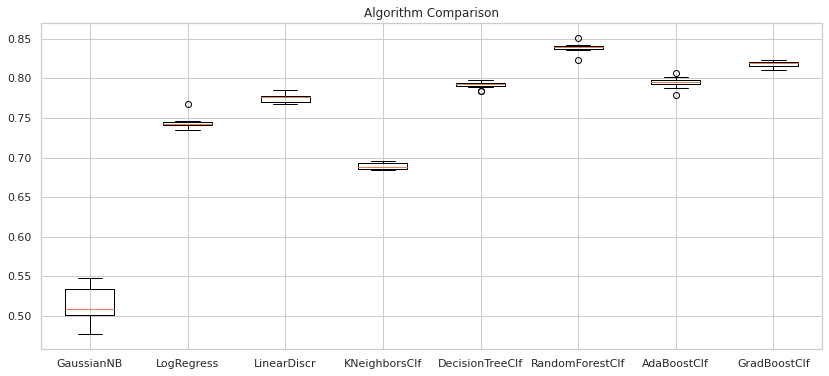

In [39]:
# Compare Algorithms
plt.figure(figsize=(14,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

#### Observations: Baseline Models
- The best performing models:
    
    - __LogRegress__	
    - __DecisionTreeClf__
    - __RandomForestClf__	  
    - __AdaBoostClf__	     
    - __GradBoostClf__	    
    - __XGBClassifier__	  

# Build Predictive Models for Selected Classifiers

- Selected classifiers to continue further analyis:

    - __LogRegress__	
    - __DecisionTreeClf__
    - __RandomForestClf__	  
    - __AdaBoostClf__	     
    - __GradBoostClf__	    
    - __XGBClassifier__	       

## Perform Scaling

> Update feature engineering to perform __scaling__ of the data in an effort to improve the model performance.

### StandardScaler()

In [ ]:
# StandardScaler()
from sklearn.preprocessing import StandardScaler

pipe_logRegr = Pipeline([('scaler', StandardScaler()),
        ('clf', LogisticRegression())])

pipe_dt = Pipeline([('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier())])

pipe_rf = Pipeline([('scaler', StandardScaler()),
        ('clf', RandomForestClassifier())])

pipe_ab = Pipeline([('scaler', StandardScaler()),
        ('clf', AdaBoostClassifier())])

pipe_gb = Pipeline([('scaler', StandardScaler()),
        ('clf', GradientBoostingClassifier())])

pipe_xgb = Pipeline([('scaler', StandardScaler()),
        ('clf', XGBClassifier())])

# List of pipelines, List of pipeline names
pipelines = [pipe_logRegr, pipe_dt, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LogRegress', 'DecisionTreeClf', 'RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]

# Loop to fit each of the pipelines in the named list
for pipe in pipelines:
    #print(pipe)
    pipe.fit(X_train, y_train)

# Compare Test and Train Accuracy Scores
for index, val in enumerate(pipelines):
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(val.score(X_test, y_test),6)} \t Train Accuracy Score: {round(val.score(X_train, y_train),6)}')

### MinMaxScaler()

In [ ]:
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

pipe_logRegr = Pipeline([('mms', MinMaxScaler()),
        ('clf', LogisticRegression())])

pipe_dt = Pipeline([('mms', MinMaxScaler()),
        ('clf', DecisionTreeClassifier())])

pipe_rf = Pipeline([('mms', MinMaxScaler()),
        ('clf', RandomForestClassifier())])

pipe_ab = Pipeline([('mms', MinMaxScaler()),
        ('clf', AdaBoostClassifier())])

pipe_gb = Pipeline([('mms', MinMaxScaler()),
        ('clf', GradientBoostingClassifier())])

pipe_xgb = Pipeline([('mms', MinMaxScaler()),
        ('clf', XGBClassifier())])

# List of pipelines, List of pipeline names
pipelines = [pipe_logRegr, pipe_dt, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LogRegress', 'DecisionTreeClf', 'RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]
# Loop to fit each of the pipelines in the named list
for pipe in pipelines:
    #print(pipe)
    pipe.fit(X_train, y_train)

# Compare Test and Train Accuracy Scores
for index, val in enumerate(pipelines):
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(val.score(X_test, y_test),6)} \t Train Accuracy Score: {round(val.score(X_train, y_train),6)}')

### RobustScaler()

In [ ]:
# RobustScaler()
from sklearn.preprocessing import RobustScaler

pipe_logRegr = Pipeline([('rs', RobustScaler()),
        ('clf', LogisticRegression())])

pipe_dt = Pipeline([('rs', RobustScaler()),
        ('clf', DecisionTreeClassifier())])

pipe_rf = Pipeline([('rs', RobustScaler()),
        ('clf', RandomForestClassifier())])

pipe_ab = Pipeline([('rs', RobustScaler()),
        ('clf', AdaBoostClassifier())])

pipe_gb = Pipeline([('rs', RobustScaler()),
        ('clf', GradientBoostingClassifier())])

pipe_xgb = Pipeline([('rs', RobustScaler()),
        ('clf', XGBClassifier())])

# List of pipelines, List of pipeline names
pipelines = [pipe_logRegr, pipe_dt, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LogRegress', 'DecisionTreeClf', 'RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]

# Loop to fit each of the pipelines in the named list
for pipe in pipelines:
    #print(pipe)
    pipe.fit(X_train, y_train)

# Compare Test and Train Accuracy Scores
for index, val in enumerate(pipelines):
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(val.score(X_test, y_test),6)} \t Train Accuracy Score: {round(val.score(X_train, y_train),6)}')

#### Observations: Model - 1 | Perform Scaling 
- All models had a performance improvement from the baseline accuracy scores with all scaling algorithms.
- The best performing scaling algorithm is __RobustScaler()__. 
- The best performing model without overfitting is __GradBoostClf__:
    - __Test Accuracy Score: 0.841394 	 Train Accuracy Score: 0.843166__
- Overfitting with the following model(s): 
    - __RandomForestClf:__	 
    __Test Accuracy Score: 0.870453 	 Train Accuracy Score: 0.988823__
    - __DecisionTreeClf:__    
    __Test Accuracy Score: 0.850432 	 Train Accuracy Score: 0.996126__
        - Consider: Pruning by tuning the classifier hyperparameters.

## Parameter Tuning  Model

> Used __Pipeline__ and  __GridSearchCV__ to tune classification models for improving the model performance.

#### RandomForestClf()

In [ ]:
from sklearn.pipeline import Pipeline

# Random Forest

pipe_rf = Pipeline([('rs', RobustScaler()),
        ('clf', RandomForestClassifier(random_state = 42))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [10, 100, 120, 1000],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6, 7, 8, 20] 
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=5, verbose=0, return_train_score = True) # verbose=2

# Fit using grid search
model = gs_rf.fit(X_train, y_train)
target_names = y_test.unique().astype(str)
y_pred = model.predict(X_test)

print(f'Classification Report:\n {classification_report(y_test, y_pred, target_names=target_names)}\n')
# Best params
print(f'Model Parameters:\n {gs_rf.best_params_}\n')
# Best est and Train Accuracy
print(f'Model Accuracy Scores:')
print(f'RandomForestClf \t Test Accuracy Score: {round(model.score(X_test, y_test),6)} \t Train Accuracy Score: {round(model.score(X_train, y_train),6)}')

In [ ]:
# ''' Classification Report:
#                precision    recall  f1-score   support

#            0       0.85      0.94      0.89     18761
#            1       0.89      0.75      0.81     12108

#    micro avg       0.86      0.86      0.86     30869
#    macro avg       0.87      0.84      0.85     30869
# weighted avg       0.87      0.86      0.86     30869


# Model Parameters:
#  {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__n_estimators': 1000}

# Model Accuracy Scores:
# RandomForestClf 	 Test Accuracy Score: 0.864881 	 Train Accuracy Score: 0.895467'''

#### Gradient Boost Classifier()

In [ ]:
from sklearn.pipeline import Pipeline

# Gradient Boost

pipe_gb = Pipeline([('rs', RobustScaler()),
        ('clf', GradientBoostingClassifier(random_state = 42))])

# Set grid search params
param_grid_gb = [ 
  {'clf__n_estimators': [100, 500, 1000],
   'clf__learning_rate': [.01,.001], 
   'clf__max_depth': [3,6] 
  }
]

# Construct grid search
gs_gb = GridSearchCV(estimator=pipe_gb,
            param_grid=param_grid_gb,
            scoring='accuracy',
            cv=5, verbose=0, return_train_score = True) # verbose=2

# Fit using grid search
model = gs_gb.fit(X_train, y_train)
target_names = y_test.unique().astype(str)
y_pred = model.predict(X_test)

print(f'Classification Report:\n {classification_report(y_test, y_pred, target_names=target_names)}\n')
# Best params
print(f'Model Parameters:\n {gs_gb.best_params_}\n')
# Best est and Train Accuracy
print(f'Model Accuracy Scores:')
print(f'GradientBoostingClassifier\t Test Accuracy Score: {round(model.score(X_test, y_test),6)} \t Train Accuracy Score: {round(model.score(X_train, y_train),6)}')

In [ ]:
# ''' Classification Report:
#                precision    recall  f1-score   support

#            0       0.87      0.91      0.89     18761
#            1       0.84      0.79      0.81     12108

#    micro avg       0.86      0.86      0.86     30869
#    macro avg       0.86      0.85      0.85     30869
# weighted avg       0.86      0.86      0.86     30869


# Model Parameters:
#  {'clf__learning_rate': 0.01, 'clf__max_depth': 6, 'clf__n_estimators': 1000}

# Model Accuracy Scores:
# GradientBoostingClassifier	 Test Accuracy Score: 0.859665 	 Train Accuracy Score: 0.867296'''

#### Observations: Model -2 | Tune Classification Model(s)
- Parameter tuning improved performance significantly for both RandomForest and GradientBoost Alogorithms.
- Improved RandomForest Model Test Accuracy to __0.864881__ without overfitting.
- Improved GradientBoost Model Test Accuracy to __0.859665__ from __0.841394__.
- Removed the issue of overfitting by pruning the model:
    - Pruning by tuning the classifier hyperparameters: 
        -  RandomForestClf: {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__n_estimators': 1000}
         __Test Accuracy Score: 0.864881 | Train Accuracy Score: 0.895467__
        
        -  GradientBoosting: {'clf__learning_rate': 0.01, 'clf__max_depth': 6, 'clf__n_estimators': 1000}
        __Test Accuracy Score: 0.859665 | Train Accuracy Score: 0.867296__

## Capturing Most Predictive Features

### RFECV

In [ ]:
from sklearn.feature_selection import RFECV
estimator = RandomForestClassifier(random_state=42)
selector = RFECV(estimator, step=1, cv=10, scoring = 'accuracy')
selector = selector.fit(X_train, y_train)
display(selector.support_) # List of boolean values
display(selector.ranking_)

In [ ]:
# List of X Train Columns
X_train.columns
X_train.shape

#### Most Predictive Features

In [ ]:
# Most Predictive Features
rfecv_mask = selector.get_support()  # List of boolean values
best_features = []

for each_bool, feat in zip(rfecv_mask, X_train.columns):
    if each_bool == True:
        best_features.append(feat)
print(f'Optimal number of predictive features: {selector.n_features_}')
print(f'Number of most predictive features: {len(best_features)}')
print(f'Most Predictive Features: \n {best_features}')

In [ ]:
# Diagram of Optimal number of features_
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Least Predictive Features

In [ ]:
# Least Predictive Features:
rfecv_mask = selector.get_support()  # List of boolean values
worst_features = []

for each_bool, feat in zip(rfecv_mask, X_train.columns):
    if each_bool == False:
        worst_features.append(feat)

print(f'Number of least predictive features: {len(worst_features)}')
print(f'Least Predictive Features: \n {worst_features}')

least_import_feat = worst_features #least_import_feat

In [ ]:
# Drop the least important feature(s) from X_train and X_test
X_train = X_train.drop(least_import_feat, axis=1)
X_test = X_test.drop(least_import_feat, axis=1)

In [ ]:
print(X_train.shape, X_test.shape )

### Re-run Algorithm(s) - Determine Best Performing Model

In [ ]:
import importlib
importlib.reload(m_ml)

In [ ]:
# Re-run models to determine the best performing model

pipe_logRegr = Pipeline([('rs', RobustScaler()),
        ('clf', LogisticRegression())])

pipe_rf = Pipeline([('rs', RobustScaler()),
        #('clf', RandomForestClassifier(random_state = 42))])
         ('clf', RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=1000, n_jobs=-1, random_state = 42))])

pipe_ab = Pipeline([('rs', RobustScaler()),
        ('clf', AdaBoostClassifier(random_state = 42))])

pipe_gb = Pipeline([('rs', RobustScaler()),
        #('clf', GradientBoostingClassifier(random_state = 42))])
        ('clf', GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=1000, random_state = 42))])

pipe_xgb = Pipeline([('rs', RobustScaler()),
        ('clf', XGBClassifier(random_state = 42))])

# List of pipelines, List of pipeline names
pipelines = [pipe_logRegr, pipe_rf, pipe_ab, pipe_gb, pipe_xgb]
pipeline_names = ['LogRegress', 'RandomForestClf', 'AdaBoostClf','GradBoostClf','XGBClassifier' ]
scoring_results = []

# Loop to fit each of the pipelines in the named list
for index, pipe in enumerate(pipelines):
    #print(pipe)
    pipe.fit(X_train, y_train)
    
    # Fit using grid search
    model = pipe.fit(X_train, y_train)
    target_names = ['is_not_canceled (0)', 'is_canceled (1)'] #y_test.unique().astype(str)
    y_pred = model.predict(X_test)
    
    # Compare Test and Train Accuracy Scores
    print(f'{pipeline_names[index]}\t Test Accuracy Score: {round(pipe.score(X_test, y_test),6)} \t Train Accuracy Score: {round(pipe.score(X_train, y_train),6)}\n')
    scoring_results.append(round(pipe.score(X_test, y_test),6))
    
    # Null Accuracy
    y_test.value_counts()/len(y_test)
    print(f'Null Accuracy:\n{y_test.value_counts().head(1)/len(y_test)}\n')
    
    # cohen_kappa_score
    print(f'cohen_kappa_score: \n {cohen_kappa_score(y_test, y_pred)} \n')
    
    # matthews_corrcoef
    print(f'matthews_corrcoef: \n {matthews_corrcoef(y_test, y_pred)} \n')
    
    # roc_auc_score
    print(f'roc_auc_score: \n {roc_auc_score(y_test, y_pred)} \n')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    TP = cm[1,1]  # True Positives
    TN = cm[0,0]  # True Negatives
    FP = cm[0,1]  # False Positves - Type I Errors
    FN = cm[1,0]  # False Negatives - Type II Errors
    num_pred = len(y_pred)
    
    print(f'The classifier made a total of {len(y_pred)} predictions.\n')
    print(f'The classifier predicted guests booked the hotel {TN+FN} times, and canceled {TP+FP} times.')
    print(f'Actually, {TN+FP} guests booked the hotel and {TP+FN} guests canceled.')
    print(f'_________ \n')
    print(f'Confusion Matrix Metrics: TP = {TP} | TN = {TN} | FP = {FP} | FN = {FN} \n')
    print(f'\n{cm}\n')  # Print confusion matrix
    print(f'Number of Type I Errors: {FP}')
    print(f'Number of Type II Errors: {FN}')
    
    f, ax = plt.subplots(figsize =(3,3))
    sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",ax=ax)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    print(f'Classification Report:\n {classification_report(y_test, y_pred, target_names=target_names)}\n')
    m_ml.print_metrics(y_test, y_pred, TN, TP, FN, FP, num_pred)
    print(f'################################################################################# \n')

final_scoring_results = list(zip(pipeline_names, scoring_results))
final_scoring_results = pd.DataFrame(final_scoring_results, columns=['Classifier','Acc Score (test)'])

#### Observations: Determine Best Performing Model


In [ ]:
final_scoring_results = pd.DataFrame(final_scoring_results)
final_scoring_results.columns = ['Classifier','Acc Score (test)']
final_scoring_results

> __GradBoostClf__ and __RandomForestClf__ models worked the best out of all of our models giving the highest accuracy scores:
- GradBoostClf:	 __Test Accuracy Score: 0.860734 	 Train Accuracy Score: 0.870337__
- RandomForest:  __Test Accuracy Score: 0.875377 	 Train Accuracy Score: 0.924512__


### Identify the most Predictive Features

In [ ]:
# Determine the most Predictive Features
# clf = RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=100, random_state=42)
clf = RandomForestClassifier(random_state=42)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
features = X_train.columns

# Graph Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)
#print(indices)
plt.figure(figsize=(40, 25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
# View the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

#### Observations: Identify Most Predictive Features
From our analysis, we concluded that the most useful features for prediction were the following features (Top 15):

- lead_time                        0.116716
- deposit_type_Non Refund          0.108665
- country_PRT                      0.080293
- adr                              0.078294
- total_of_special_requests        0.069174
- arrival_date_day_of_month        0.056989
- agent                            0.051549
- arrival_date_week_number         0.048732
- stays_in_week_nights             0.037315
- previous_cancellations           0.030105
- stays_in_weekend_nights          0.025514
- arrival_date_year                0.024081
- required_car_parking_spaces      0.020868
- market_segment_Online TA         0.020407
- customer_type_Transient          0.019232

In [ ]:
end = datetime.datetime.now()
elapsed_time = end - start
print(f'Capstone_ML_Model Total Execution Time: {elapsed_time}')